In [2]:
from pprint import pprint
import numpy as np
import pandas as pd
np.set_printoptions(precision=4)

In [23]:
def insert_into_df(df, value):
    df.loc[-1] = value
    df.reset_index(drop=True, inplace=True)

# Deep Learning

Deep Learning is a subset of machine learning, a field that is dedicated to study and develop the machines that can learn. Deep learning is generally implemented with the help of neural networks. These neural networks take input data, learn from it and then make predictions.

### Explanation about neural networks in phases as we learn in the book, it evolves into perfection by progressing in the book
Def1: A neural network is one or more weights that you can multiply by the input data in order to make prediction

**Input data**: It's a number that you recorded in the real world somewhere., like today's temperature, a batsmen average score, yesterday stock price, etc.

**Prediction**: Given input data, a neural network tells you a prediction like, given today's temperature, it's likely to rain.. given yesterday's stock price, today's stock price will be xxx.xx, etc.

**How neural network learns**: By trail and error. It first makes a prediction of a known input, then compares to the original and then learns from it and changes the weight either up or down and continue the process again until it reaches a good result

A typical neural network works as following

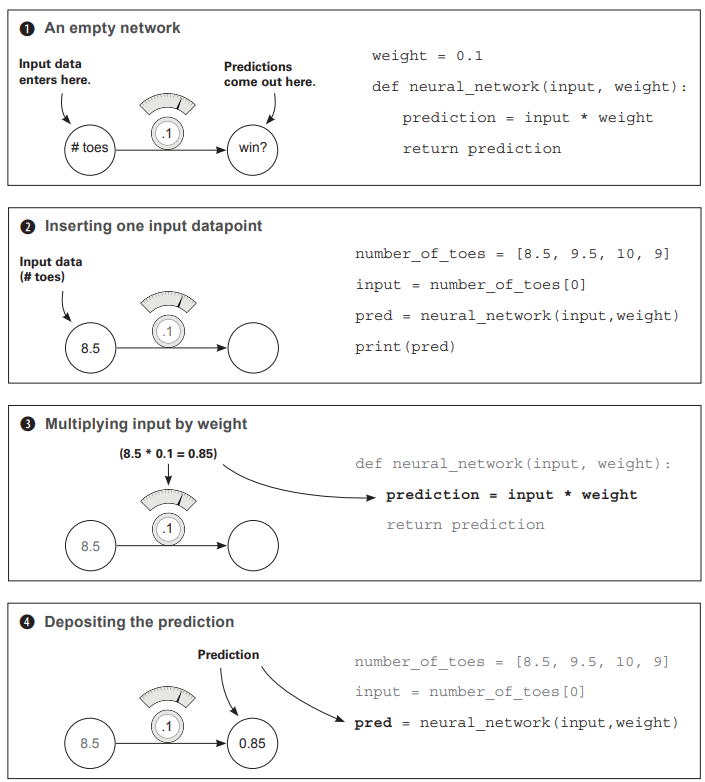

# Neural Networks

A typical neural network does 3 steps, as like any other model:
1. Predict
2. Compare
3. Learn

From the image above, we have input data, and a knob(knows as the term weight, which we are going to use from the next occurance of the same term) mapping the input data and then the prediction by multiplying the input data with knob angle. The knob adjusts the angle with the weight that we need to multiply the input data. This process of adjusting the knob(weight) to a value that would give us the most accurate prediction is learning.

**The example that we are going to use to build a basic neural network is: A baseball team needs prediction if they are going to lose or win based on features like no.of toes(average number of toes per player), number of wins/losses, number of fans, etc.**

## A neural network consists of 3 parts
### 1. data:
    the number of data points to choose to send through a network at a time depends on the input data. If an image is being sent, like say a cat. Then the input data to send at a time would be the pixels containing the whole one single image.
   
***Rule of thumb for number of input data: Always present enough information to the network, where "enough information" defined loosely as how much a human might need to make the same prediction ***

You can create a network only when you understand the shape of input and output datasets

### 2. machine

### 3. prediction

# Step 1: Predict

# Forward Propagation

The neural network first takes in the input data points and make a prediction. This is called as forward propagation

Let us build a neural network consisting of one datapoint, one weight mapping from input to output

In [2]:
# An empty neural network with an initial weight(set by us)

weight = 0.1

def neural_network(input, weight):
    prediction = input * weight
    return prediction

In [3]:
# Inserting one input data point
number_of_toes = [8.5, 9.5, 10, 9]
input = number_of_toes[0]
pred = neural_network(input, weight)
print(round(pred, 4))

0.85


### What does a neural network do

It multiplies the input by a certain weight, i.e., it scales the input by a certain amount. If the weight was 2, then, it would have doubled the input, if it was 0.01, it would have made input 100 times smaller. So the weight can make input scale smaller or larger

NN accepts an input data as `information` and weight as `knowledge`. It uses knowledge in the weights to interpret the information in the input. 

The neural network that we built does not have access to the previously ran prediction. i.e., if we were to pass now `number_of_toes[1]` to the network, it does not have the previously made prediction. Later we are going to see how to pass the neural network a `short term memory` by feeding multiple inputs to it

Weights are measure of sensitivity between input data and its prediction.

Our weight knob tells us the likelihood of winning the match. But the network we built doesn't have complete or enough information to make the prediction. If the team had an average of 0 toes, they might play really bad. So our network may or may not work as baseball is much complicated than that. Next we are going to build a neural network that accepts multiple inputs or multiple pieces of information at the same time so that the neural network can make more informed decisions

## Making predictions in multiple inputs

A neural network can accept multiple inputs at a single time. This time for the experiment, we shall also consider **number of wins/losses** of the team and **number of fans** for the team

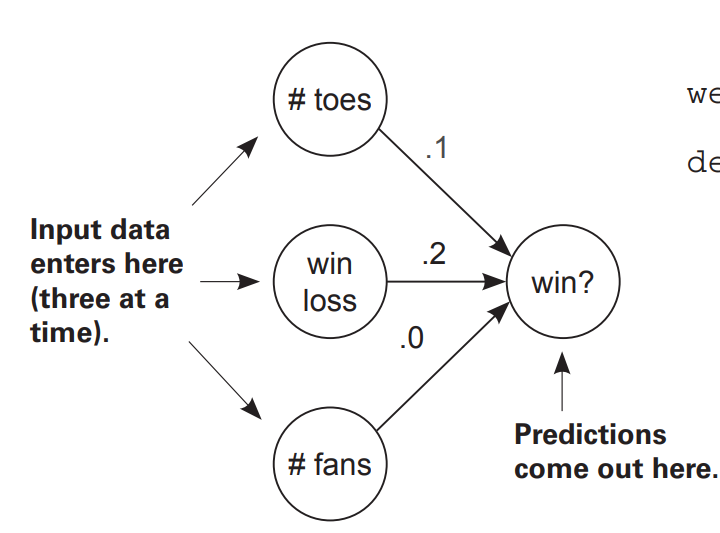

In [4]:
# An empty network with multiple inputs - core python implementation

weights = [0.1, 0.2, 0]

def neural_network(input, weights):
    pred = w_sum(input, weights)
    return pred

# Performing weighted sum of input
def w_sum(a, b):
    assert len(a) == len(b)
    output = 0
    
    for i in range(len(a)):
        output += a[i] * b[i]
    return output

In [6]:

# Inserting one datapoint


# This dataset is the current status at the beginning of 
# each game for the first four games in a season: 
# toes = current average number of toes per player
# wlrec = current games won (percent)
# nfans = fan count (in millions).

toes = [8.5, 9.5, 9.9, 9.0] 
wlrec = [0.65, 0.8, 0.8, 0.9] 
nfans = [1.2, 1.3, 0.5, 1.0]

input = [toes[0], wlrec[0], nfans[0]]

pred = neural_network(input, weights)
print(pred)

0.9800000000000001


In the above dataset, we have the first datapoint, i.e., no.of toes of the players in the first game, no of wins for the season and number of fans for the team as of on first game.

| Input | Weight | local predictions |
| --- | --- | --- |
| 8.5 | 0.1 | 0.85 |
| 0.65 | 0.2 | 0.13 |
| 1.2 | 0 | 0 |

<br/>
<center>Total Probability $=$ $\sum$Individual Probabilities $=$ 0.85 + 0.13 + 0 $=$ 0.98</center>

So in the above neural network, we multiply input with weights and then add the individual prediction to make a single prediction. It multiplies three inputs by three knob weights and sum them. This is what we call a weighted sum.

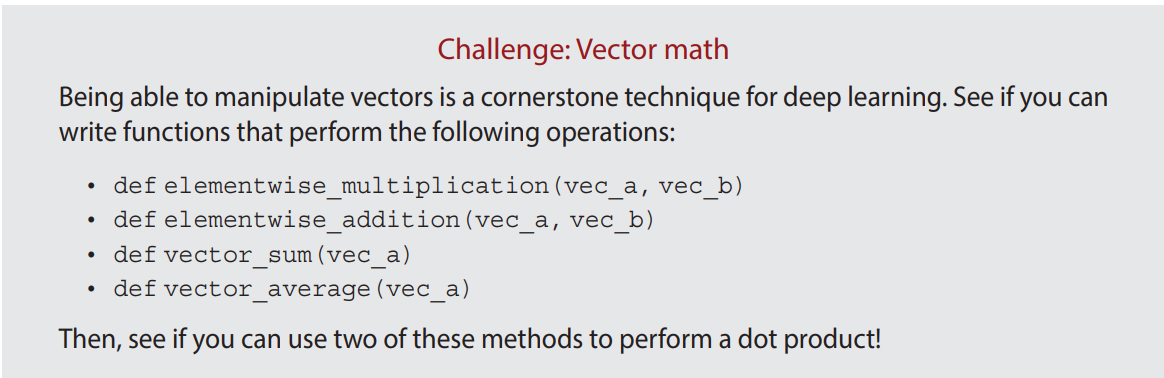

In [5]:
%%time

# Above functions without numpy
def elementwise_multiplication(vec_a, vec_b):
    assert len(vec_a) == len(vec_b)
    output = []
    for i in range(len(vec_a)):
        output.append(vec_a[i] * vec_b[i])
    
    return output



def elementwise_addition(vec_a, vec_b):
    assert len(vec_a) == len(vec_b)
    output = []
    for i in range(len(vec_a)):
        output.append(vec_a[i] + vec_b[i])
    
    return output


def vector_sum(vec_a):
    s = 0
    for i in vec_a:
        s += i
        
    return s


def vector_average(vec_a):
    s = vector_sum(vec_a)
    avg = s / len(vec_a)
        
    return avg


# Dot Product using above functions
def dot_product(vec_a, vec_b):
    el_mul = elementwise_multiplication(vec_a, vec_b)
    vec_sum = vector_sum(el_mul)
    return vec_sum

print("Elementwise Multiplication ", elementwise_multiplication(input, weights))
print("Elementwise Addition ", elementwise_addition(input, weights))
print("Vector sum ", vector_sum(input))
print("Vector average ", vector_average(input))
print("Dot Product ", dot_product(input, weights))

Elementwise Multiplication  [0.8500000000000001, 0.13, 0.0]
Elementwise Addition  [8.6, 0.8500000000000001, 1.2]
Vector sum  10.35
Vector average  3.4499999999999997
Dot Product  0.9800000000000001
CPU times: total: 0 ns
Wall time: 0 ns


 **In order to make the computation more faster and flexible than with lists in python, we can use vectorized arrays, which are provided by numpy (Numerical Python) package from python.** 

Neural Networks give prediction as with how similar the inputs and weights are. 

In [7]:
%%time

# !pip install numpy -- RUN IF NOT INSTALLED
import numpy as np

input, weights = np.array(input), np.array(weights)

def elementwise_multiplication(vec_a, vec_b):
    assert len(vec_a) == len(vec_b)
    output = vec_a * vec_b
    return output



def elementwise_addition(vec_a, vec_b):
    assert len(vec_a) == len(vec_b)
    output = vec_a + vec_b
    
    return output


def vector_sum(vec_a):
    s = np.sum(vec_a)
    return s


def vector_average(vec_a):
    avg = np.mean(vec_a)
    return avg


# Dot Product using above functions
def dot_product(vec_a, vec_b):
    output = np.dot(vec_a, vec_b)
    return output

print("Elementwise Multiplication ", elementwise_multiplication(input, weights))
print("Elementwise Addition ", elementwise_addition(input, weights))
print("Vector sum ", vector_sum(input))
print("Vector average ", vector_average(input))
print("Dot Product ", dot_product(input, weights))

Elementwise Multiplication  [0.85 0.13 0.  ]
Elementwise Addition  [8.6  0.85 1.2 ]
Vector sum  10.35
Vector average  3.4499999999999997
Dot Product  0.9800000000000001
CPU times: total: 0 ns
Wall time: 0 ns


As the dataset above is very small, the difference is not very distinguishable, but numpy is much faster

## Prediction with multiple outputs

Instead of predicting just whether the team won or lost, 
you’re also predicting whether the players are happy 
or sad and the percentage of team members who are 
hurt. You make this prediction using only the current 
win/loss record.

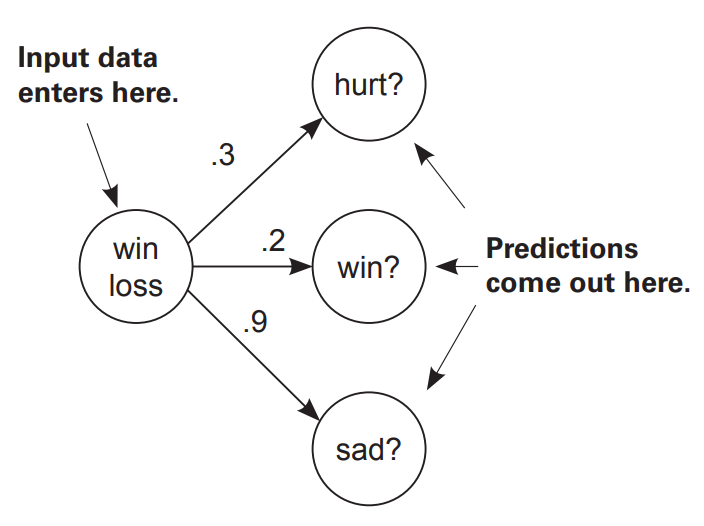

In [12]:
# An empty neural network with multiple outputs
weights = np.array([0.3, 0.2, 0.9])

def vector_single_number_multiplication(input, weights):
    mul = weights * input
    return mul


def neural_network(input, weights):
    pred = vector_single_number_multiplication(input, weights)
    return pred


# Inserting one datapoint
wlrec = [0.65, 0.8, 0.8, 0.9]
input = wlrec[0]
pred = neural_network([input], weights)
print(pred)

[0.195 0.13  0.585]


| Input | Weight | Individual Probability |
| - | - | - |
| 0.65 | 0.3 | 0.195|
| 0.65 | 0.2 | 0.13|
| 0.65 | 0.9| 0.585|


## Predicting with Multiple Inputs and Multiple Outputs

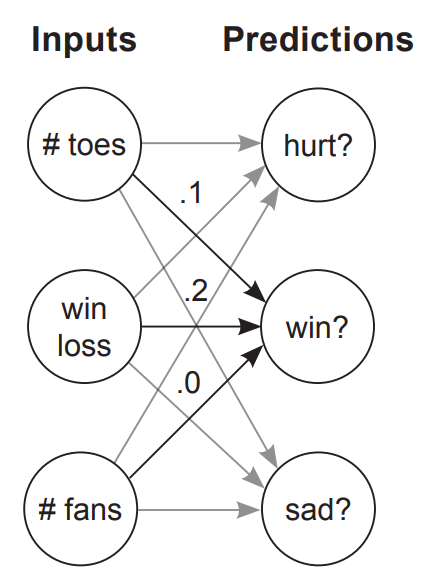

In [34]:
# An empty neural network with multiple inputs and outputs
         # toes % win # fans
weights = [[0.1, 0.1, -0.3], # hurt?
           [0.1, 0.2, 0.0], # win?
           [0.0, 1.3, 0.1] ] # sad?
weights = np.array(weights)


def vector_matrix_multiplication(input, weights):
    mat_mul = elementwise_multiplication(input, weights)
    print("Elementwise multiplication", mat_mul, sep="\n")
    vec_sum = list(map(vector_sum, mat_mul))
    return vec_sum

# Inserting one datapoint

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65,0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
input = [toes[0],wlrec[0],nfans[0]]
input = np.array(input)
pprint(weights)
pprint(input)
pred = neural_network(input, weights)
print("vector_sum_predicitons", pred, sep="\n")

array([[ 0.1,  0.1, -0.3],
       [ 0.1,  0.2,  0. ],
       [ 0. ,  1.3,  0.1]])
array([8.5 , 0.65, 1.2 ])
Elementwise multiplication
[[ 0.85   0.065 -0.36 ]
 [ 0.85   0.13   0.   ]
 [ 0.     0.845  0.12 ]]
vector_sum_predicitons
[0.555, 0.9800000000000001, 0.9650000000000001]


|w_1 * i_1|w_2 * i_2|w_3 * i_3|$\sum$ wi|prediction|
|-|-|-|-|-|
| (8.5 * 0.1) | (0.65 * 0.1) | (1.2 * –0.3) | 0.555 | hurt prediction |
| (8.5 * 0.1) | (0.65 * 0.2) | (1.2 * 0.0) | 0.98 | win prediction |
| (8.5 * 0.0) | (0.65 * 1.3) | (1.2 * 0.1) | 0.965 | sad prediction |

The neural network performs 3 individual weighted sums, one for hurt prediction and one more for both win and sad with corresponding weights for the three prediciton categories with the same input.

So from above table, we can see that each input is multiplied with corresponding weights, i.e., to all the weight row vectors respective elements. This would lead to vector matrix multiplication and then vector sum of product of weights and inputs leading to three predictions

## Predictions on Predictions

Neural networks can be stacked. You can take output of one network and pass that as input to another network to do the same steps mentioned above. This results in two consecutive vector matrix multiplication. This would help in the case when there is very complex data and it's patterns cannot be detected with a single neural network. 

So in general, the deeper the network, the deeper the data is understood by the network. (But of course, if the network goes way deeper, it could overfit the data and lead to bad predictions. The network should generalize the data pattern. It can both overfit and underfit(generalizing the data way too much) the data. The smaller the network, the chances of underfitting increases and deeper the network, chance for overfitting increases)

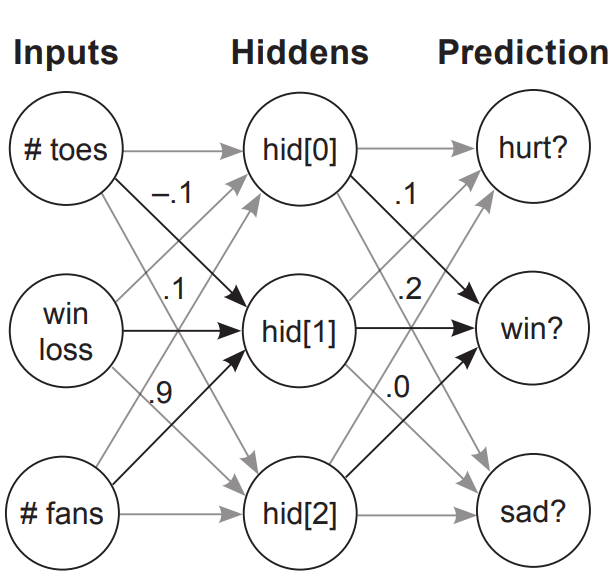

In [37]:
 # toes % win # fans
ih_wgt = [ [0.1, 0.2, -0.1], # hid[0]
           [-0.1,0.1, 0.9], # hid[1]
           [0.1, 0.4, 0.1] ] # hid[2]

         #hid[0] hid[1] hid[2]
hp_wgt = [ [0.3, 1.1, -0.3], # hurt?
           [0.1, 0.2, 0.0], # win?
           [0.0, 1.3, 0.1] ] # sad?

weights = [ih_wgt, hp_wgt]
weights = np.array(weights)
pprint(weights)



def neural_network(input, weights1):
    hid = vector_matrix_multiplication(input, weights[0])
    pred = vector_matrix_multiplication(hid, weights[1])
    return pred

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65,0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
input = [toes[0],wlrec[0],nfans[0]]

pred = neural_network(input, weights)
print(pred)

array([[[ 0.1,  0.2, -0.1],
        [-0.1,  0.1,  0.9],
        [ 0.1,  0.4,  0.1]],

       [[ 0.3,  1.1, -0.3],
        [ 0.1,  0.2,  0. ],
        [ 0. ,  1.3,  0.1]]])
Elementwise multiplication
[[ 0.85   0.13  -0.12 ]
 [-0.85   0.065  1.08 ]
 [ 0.85   0.26   0.12 ]]
Elementwise multiplication
[[ 0.258   0.3245 -0.369 ]
 [ 0.086   0.059   0.    ]
 [ 0.      0.3835  0.123 ]]
[0.21350000000000002, 0.14500000000000002, 0.5065]


The techniques explained above are the formats of any neural network. we can build a simple neural network as simple as the first one we built, that is one input, one weight and one output or it can be built with an image that is very large and having multiple weights for multiple outputs stacking on another layer of network


**So as a summary, neural networks perform repeated weighted sums to the input in order to make a prediction. This is called as forward propagation, as we are propagating the activations forward through the network. In these examples, activations are all the 
numbers that are not weights and are unique for every prediction**

# Gradient Descent

# Step 2: Compare

Comparing gives us the measurement that how much the prediction missed by the actual. 

Generally, once you make a prediction, the next step would be evaluating the prediction. An error(the measurement that how much the prediction missed by) is always positive. If we consider an archery match, if the arrow misses the bullseye by one inch to either side, the error would always be one inch. The same logic is applied here too. We generally take the absolute value of the error, either by considering it as distance(so always positive, implemented with the help of absolute function) or square the error to remove the negativity to the value.

For demonstration in this section, we are going to use ***mean square error*** as our way of measuring error


Measuring(Comparing) the error would not tell us either why or which direction we missed the target or what should we do in order to fix the error. It merely says, big miss or little miss or perfect prediction. To do something with this error to fix the error, the next step is crucial, i.e., ***learn***

# Step 3: Learn

Learning tells each weight how it can change to reduce the error. 

Learning is about error attribution or the art of figuring out what role each weight played in its part in creating error. 

Learning in neural networks is done by a very famous paradigm called **Gradient Descent**

At the end of the day, it results in computing a number for each weight. That number 
represents how that weight should be higher or lower in order to reduce the error. Then 
you’ll move the weight according to that number, and you’ll be finished.

In [31]:
# measuring error
knob_weight = 0.8
input = 0.5
goal_pred = 0.8

pred = input * knob_weight
error = (goal_pred - pred) ** 2
print(error)

0.16000000000000003


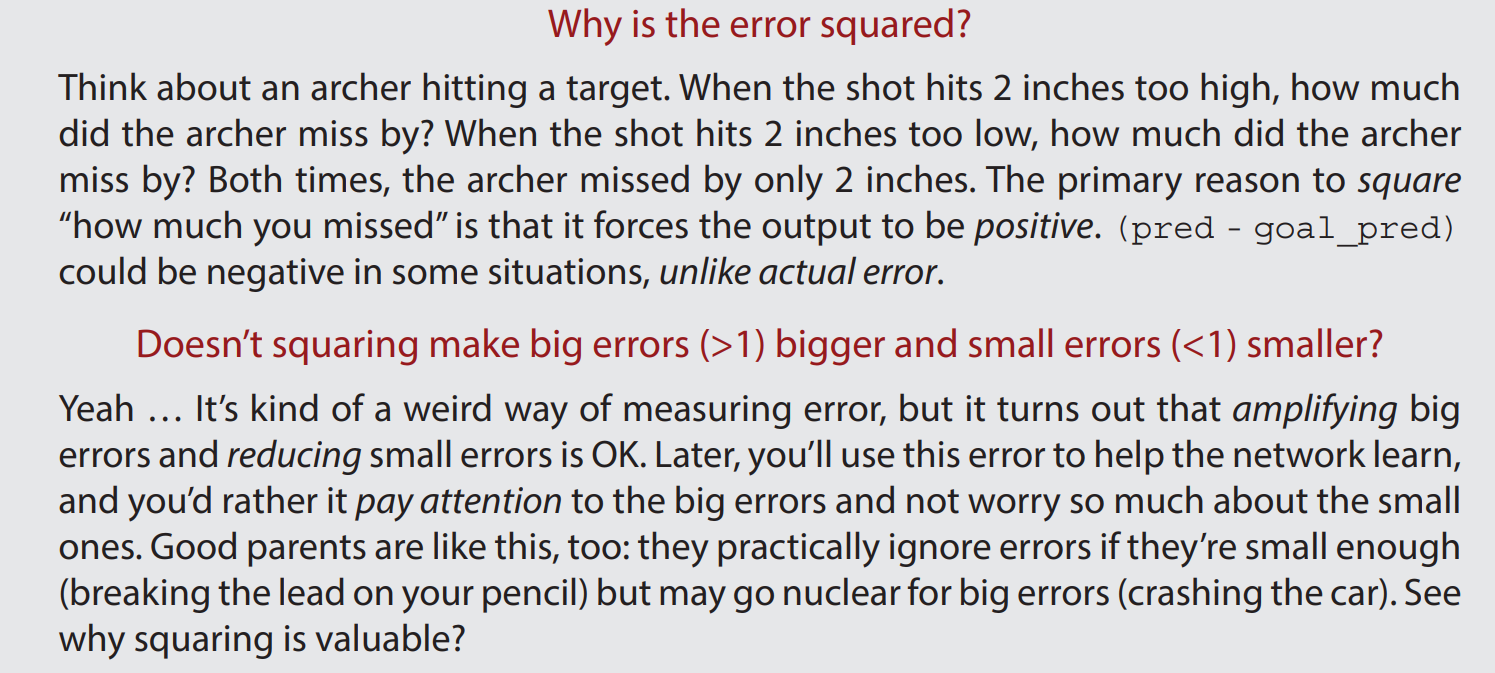

## Learning using hot and cold method

The goal of gradient descent is to keep error to it's minimum by adjusting the weight to up or down. If this goes on happening and the error reaches 0, then the goal is achieved. We do this by trying to adjust the weight both up or down and see which reduces the error.


The process of wiggling the weights to see in which direction reduces the error the most, moving the weights in that direction until the error reaches 0 is called **Hot and Cold Learning**

### Single iteration of Hot and Cold Learning

In [36]:
# log to track error
df = pd.DataFrame(columns=['weight', 'prediction', 'true', 'error'])

# An empty network

weight = 0.1
lr = 0.01

def neural_network(input, weight):
    pred = input * weight
    return pred


# Making a prediction and evaluating the error
number_of_toes = [8.5]
win_or_lose_binary = [1] # 1 = win, 0 = loss

input = number_of_toes[0]
true = win_or_lose_binary[0]

pred = neural_network(input, weight)
error = (true - pred) ** 2

insert_into_df(df, [weight, pred, true, error])

# Making the prediction with higher weight and evaluating the error

weight_up = weight + lr
pred = neural_network(input, weight_up)
error_up = (true - pred) ** 2

insert_into_df(df, [weight_up, pred, true, error_up])

# Making the prediction with lower weight and evaluating the error

weight_down = weight - lr
pred = neural_network(input, weight_down)
error_down = (true - pred) ** 2

insert_into_df(df, [weight_down, pred, true, error_down])

if error > error_up or error > error_down:
    if error_down < error_up:
        weight = weight - lr
    if error_down > error_up:
        weight = weight + lr


print("the latest weight", weight)
df

the latest weight 0.11


,weight,prediction,true,error
0,0.10,0.850,1.0,0.022500
1,0.11,0.935,1.0,0.004225
2,0.09,0.765,1.0,0.055225


### Increased number of iterations for hot and cold method

In [58]:
weight = 0.5
input = 0.5
lr = 0.001
true = 0.8


for i in range(1101):
    print("Iteration", i+1)
    pred = input * weight
    error = (true - pred) ** 2
    print("Active Weight", weight, "with prediction", pred, "with error", error)

    step_up_weight = weight + lr
    step_down_weight = weight - lr

    pred_up = input * step_up_weight
    error_up = (pred_up - true) ** 2
    print("Increased Weight to", weight, "with prediction", pred_up, " and the new error is", error_up)
    
    pred_down = input * step_down_weight
    error_down = (pred_down - true) ** 2
    
    print("Decreased Weight to", weight, "with prediction", pred_down, " and the new error is", error_down)
    
    if error_up > error_down:
        weight = step_down_weight
    if error_up < error_down:
        weight = step_up_weight
    print("The new weight is", weight)
    print("-"*80)

Iteration 1
Active Weight 0.5 with prediction 0.25 with error 0.30250000000000005
Increased Weight to 0.5 with prediction 0.2505  and the new error is 0.3019502500000001
Decreased Weight to 0.5 with prediction 0.2495  and the new error is 0.30305024999999997
The new weight is 0.501
--------------------------------------------------------------------------------
Iteration 2
Active Weight 0.501 with prediction 0.2505 with error 0.3019502500000001
Increased Weight to 0.501 with prediction 0.251  and the new error is 0.30140100000000003
Decreased Weight to 0.501 with prediction 0.25  and the new error is 0.30250000000000005
The new weight is 0.502
--------------------------------------------------------------------------------
Iteration 3
Active Weight 0.502 with prediction 0.251 with error 0.30140100000000003
Increased Weight to 0.502 with prediction 0.2515  and the new error is 0.30085225
Decreased Weight to 0.502 with prediction 0.2505  and the new error is 0.3019502500000001
The new we

### Problem 1: It’s inefficient.

You have to predict multiple times to make a single knob_weight update. This seems very 
inefficient. 

### Problem 2: Sometimes it’s impossible to predict the exact 
goal prediction.

With a set step_amount, unless the perfect weight is exactly n*step_amount away, the network 
will eventually overshoot by some number less than step_amount. When it does, it will then 
start alternating back and forth between each side of goal_prediction. Set step_amount to 0.2 
to see this in action. If you set step_amount to 10, you’ll really break it. When I try this, I see the 
following output. It never remotely comes close to 0.8!

<center>
Error:0.3025 Prediction:0.25<br/>
Error:19.8025 Prediction:5.25<br/>
Error:0.3025 Prediction:0.25<br/>
Error:19.8025 Prediction:5.25<br/>
Error:0.3025 Prediction:0.25<br/>
....
.... repeating infinitely...
</center>

**The real problem is that even though you know the `correct direction` to move weight, you don’t know 
the `correct amount`.** Instead, you pick a fixed one at random (`step_amount`). Furthermore, this amount 
has nothing to do with error. Whether error is big or tiny, step_amount is the same. So, hot and cold 
learning is kind of a bummer. It’s inefficient because you predict three times for each weight update, and 
step_ amount is arbitrary, which can prevent you from learning the correct weight value. 

What if you had a way to compute both direction and amount for each weight without having to 
repeatedly make predictions

## Calculating both amount and direction from error

In [78]:
weight = 0.5
true = 0.8
input = 0.5

for i in range(50):
    orig = weight
    pred = input * weight
    error = (pred - true) ** 2
    
    direction_and_amount = (pred - true) * input
    weight = weight - direction_and_amount
    print("Iteration", i+1, "weight", orig,  "Error", round(error, 10), "Prediction:", round(pred, 5))

Iteration 1 weight 0.5 Error 0.3025 Prediction: 0.25
Iteration 2 weight 0.775 Error 0.17015625 Prediction: 0.3875
Iteration 3 weight 0.9812500000000001 Error 0.0957128906 Prediction: 0.49063
Iteration 4 weight 1.1359375 Error 0.053838501 Prediction: 0.56797
Iteration 5 weight 1.251953125 Error 0.0302841568 Prediction: 0.62598
Iteration 6 weight 1.33896484375 Error 0.0170348382 Prediction: 0.66948
Iteration 7 weight 1.4042236328125 Error 0.0095820965 Prediction: 0.70211
Iteration 8 weight 1.453167724609375 Error 0.0053899293 Prediction: 0.72658
Iteration 9 weight 1.4898757934570312 Error 0.0030318352 Prediction: 0.74494
Iteration 10 weight 1.5174068450927733 Error 0.0017054073 Prediction: 0.7587
Iteration 11 weight 1.53805513381958 Error 0.0009592916 Prediction: 0.76903
Iteration 12 weight 1.553541350364685 Error 0.0005396015 Prediction: 0.77677
Iteration 13 weight 1.5651560127735138 Error 0.0003035259 Prediction: 0.78258
Iteration 14 weight 1.5738670095801353 Error 0.0001707333 Predict

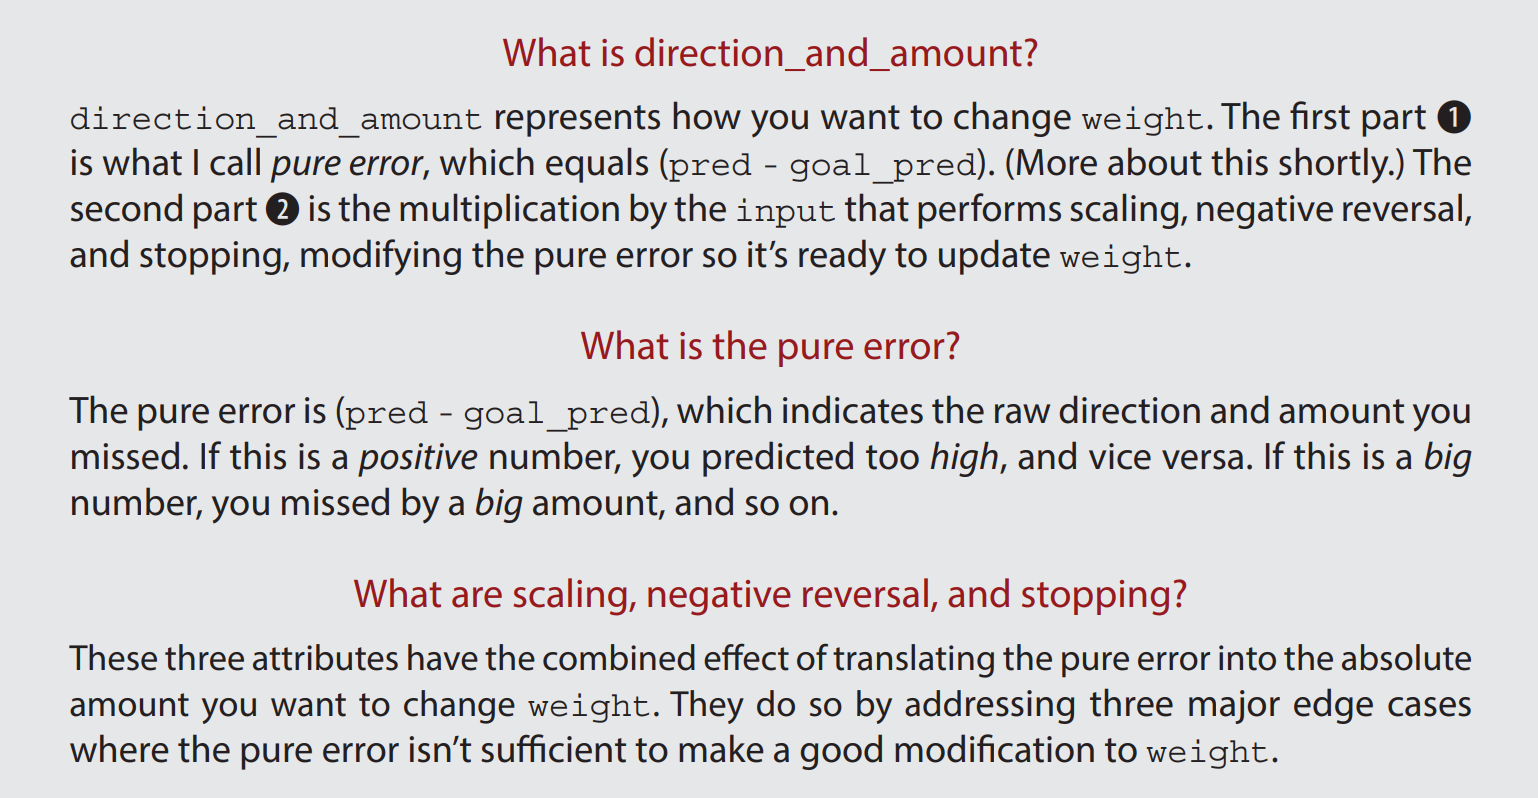
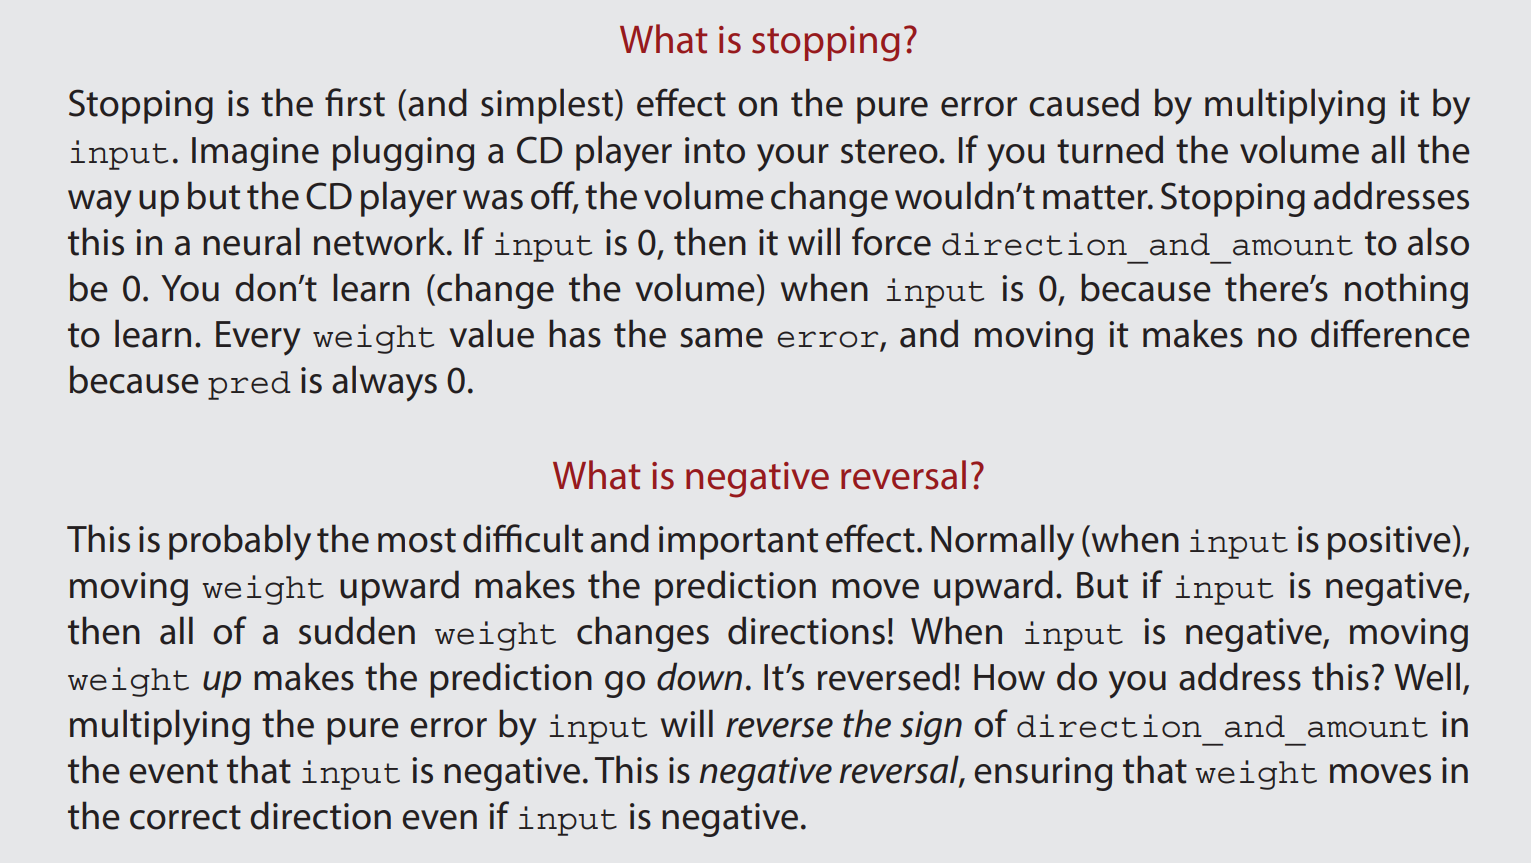
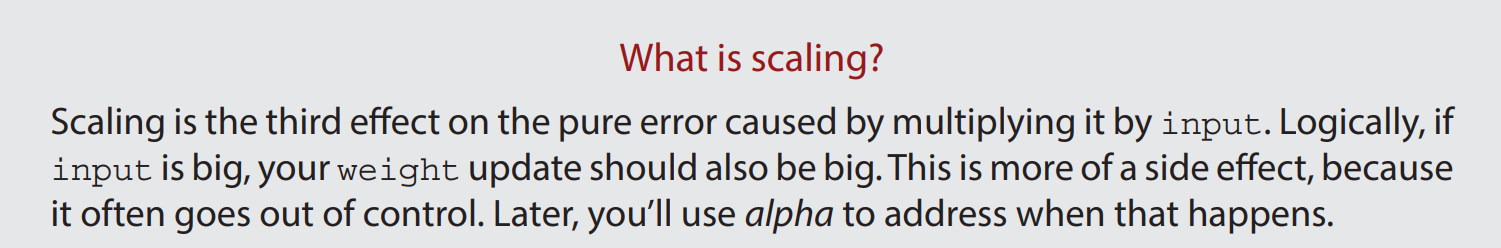

In [97]:
# addressing negative reversal
# INPUT POSITIVE
# initial weight
print("WHEN INPUT POSITIVE")

weight = 0.5
input = 0.5
pred = weight * input
print("init pred", pred)

# increasing weight
weight = 0.8
pred = weight * input
print("new pred", pred)
print("pred increased when weight increased")

# INPUT NEGATIVE
print("WHEN INPUT NEGATIVE")

weight = 0.5
input = -0.5
pred = weight * input
print("init pred", pred)

# increasing weight
weight = 0.8
pred = weight * input
print("new pred", pred)
print("pred decreased when weight increased")

# TO ADDRESS THIS, WHEN INPUT IS MULTIPLIED BY PURE ERROR, WE SEE THAT THE DIRECTION DOES NOT CHANGE
# INPUT NEGATIVE
print("WHEN INPUT NEGATIVE and INPUT MULTIPLIED BY PURE ERROR")
weight = 0.5
input = -0.5
pred = weight * input
print("init pred", pred, "with weight", weight)
ad = ((pred - true) * input)
print("direction and amount", ad)
weight = weight - ad
pred = weight * input

print("new pred", pred, "with weight", weight)


WHEN INPUT POSITIVE
init pred 0.25
new pred 0.4
pred increased when weight increased
WHEN INPUT NEGATIVE
init pred -0.25
new pred -0.4
pred decreased when weight increased
WHEN INPUT NEGATIVE and INPUT MULTIPLIED BY PURE ERROR
init pred -0.25 with weight 0.5
direction and amount 0.525
new pred 0.012500000000000011 with weight -0.025000000000000022


## Single Iteration of Gradient Descent

In [96]:
weight = 0.1
alpha = 0.01

def neural_network(input, weight):
    pred = input * weight
    return pred

# making a prediction and evaluating error


# Backward Propagation

# Regularization and Batching

# Activation Functions

# CNN

# NLP

# LSTM